<a href="https://colab.research.google.com/github/justinvaziri/cancer-classification/blob/main/Cancer_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cancer Classification using Neural Networks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

## Data Collection

In [2]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [3]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

## Cleaning Data

In [4]:
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [5]:
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
data_frame["label"] = breast_cancer_dataset.target

In [7]:
# checking null values
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [8]:
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [9]:
data_frame.shape

(569, 31)

In [10]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
data_frame["label"].value_counts()

1    357
0    212
Name: label, dtype: int64

In [12]:
data_frame.groupby("label").mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [13]:
X = data_frame.drop(columns = "label", axis = 1)
Y = data_frame["label"]

In [14]:
print(X)
print(Y)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

## Data Standardization

In [15]:
from sklearn.preprocessing import StandardScaler


In [16]:
scaler = StandardScaler()

In [17]:
standardized_data = scaler.fit_transform(X)

In [18]:
print(standardized_data)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [19]:
X = standardized_data
print(X)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [20]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


## Split into Training Testing Data

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state = 2)

In [24]:
print("Total data: ", X.shape)
print("Train data: ", X_train.shape)
print("Text data", X_test.shape)

Total data:  (569, 30)
Train data:  (455, 30)
Text data (114, 30)


## Building our Neural Network

In [25]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [27]:
# setup layers of neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (30,)),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(2, activation = "sigmoid")
])

In [28]:
# compile the neural network

model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [29]:
# train the neural network

history = model.fit(X_train, Y_train, validation_split = 0.1, epochs = 10)

Epoch 1/10
13/13 [==============================] - 1s 28ms/step - loss: 0.4832 - accuracy: 0.7922 - val_loss: 0.4061 - val_accuracy: 0.9130
Epoch 2/10
13/13 [==============================] - 0s 3ms/step - loss: 0.3403 - accuracy: 0.8778 - val_loss: 0.2832 - val_accuracy: 0.9130
Epoch 3/10
13/13 [==============================] - 0s 3ms/step - loss: 0.2628 - accuracy: 0.9193 - val_loss: 0.2233 - val_accuracy: 0.9348
Epoch 4/10
13/13 [==============================] - 0s 3ms/step - loss: 0.2200 - accuracy: 0.9389 - val_loss: 0.1874 - val_accuracy: 0.9565
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 0.1899 - accuracy: 0.9487 - val_loss: 0.1643 - val_accuracy: 0.9565
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1687 - accuracy: 0.9560 - val_loss: 0.1472 - val_accuracy: 0.9565
Epoch 7/10
13/13 [==============================] - 0s 3ms/step - loss: 0.1521 - accuracy: 0.9584 - val_loss: 0.1345 - val_accuracy: 0.9565
Epoch 8/10
13/13 [=

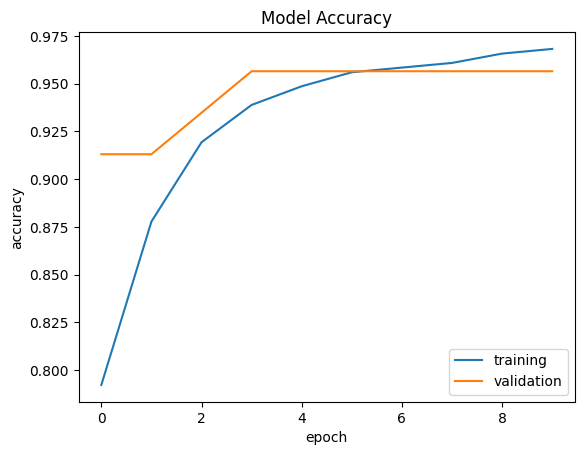

In [31]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

plt.title("Model Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")

plt.legend(["training", "validation"], loc = "lower right")

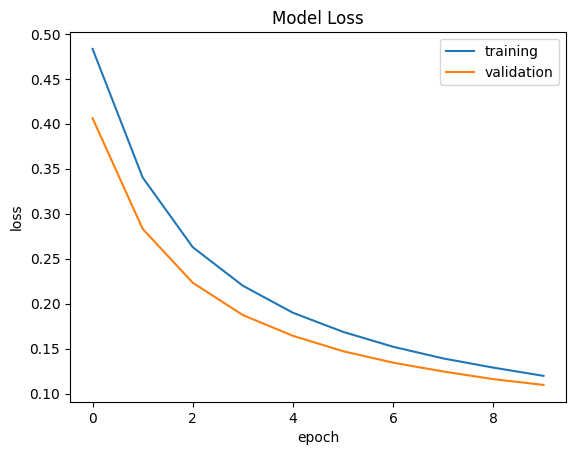

In [32]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Model Loss")
plt.ylabel("loss")
plt.xlabel("epoch")

plt.legend(["training", "validation"], loc = "upper right")

## Accuracy on Test Data

In [33]:
loss, accuracy = model.evaluate(X_test, Y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.1117 - accuracy: 0.9561


In [34]:
print(X_test.shape)

(114, 30)


In [35]:
print(X_test[0])

[-0.05319351 -1.42408329 -0.06833592 -0.17260604  2.02392516 -0.1286992
  0.15317924  0.44445235  0.60014708  0.25125475  0.50863855  2.57300558
  0.60638318  0.09687179  0.99971423  0.3907719   0.52176832  2.71439431
 -0.41073446  0.65554594 -0.3415184  -1.67683887 -0.3795077  -0.3995439
  0.30822795 -0.74978636 -0.55789673 -0.19956318 -1.19838023 -0.63261684]


In [36]:
Y_pred = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [37]:
print(Y_pred.shape)

(114, 2)


In [38]:
print(Y_pred)

[[1.83407649e-01 2.38813415e-01]
 [3.81273091e-01 5.36734641e-01]
 [2.38837656e-02 9.57459688e-01]
 [3.79569501e-01 8.96159963e-06]
 [2.82789767e-01 3.80330414e-01]
 [5.70011079e-01 1.48348967e-02]
 [1.04157872e-01 6.72619224e-01]
 [5.57871237e-02 9.29621220e-01]
 [1.23697758e-01 8.28127325e-01]
 [1.08117595e-01 8.37343812e-01]
 [4.01331902e-01 5.05650938e-01]
 [1.72598064e-01 8.40675294e-01]
 [3.83647643e-02 6.60869539e-01]
 [2.12718397e-01 7.50060380e-01]
 [3.21081914e-02 9.11962032e-01]
 [7.66753316e-01 2.92202942e-02]
 [7.26847574e-02 9.25201952e-01]
 [6.40677065e-02 7.70234942e-01]
 [3.11231278e-02 7.84411788e-01]
 [3.10974777e-01 7.57833524e-03]
 [1.05253011e-02 2.23513439e-01]
 [8.37629437e-02 9.24631953e-01]
 [2.28264347e-01 8.23846936e-01]
 [3.59049998e-02 9.28129792e-01]
 [6.14102334e-02 7.15576530e-01]
 [5.77027142e-01 3.27259079e-02]
 [2.31834233e-01 8.18372428e-01]
 [2.87727863e-01 6.97164297e-01]
 [5.06548941e-01 7.80807585e-02]
 [7.41157353e-01 5.98291606e-02]
 [2.590463

In [39]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]

In [40]:
print(Y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]
